# Analysis of Datasets

In this file we look look at the training datasets to confirm what was written in the related works sections and to find any obvious patterns in the questions to more directly hardcode in what type of answer to give

In [238]:
import json
import pandas
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

## Load Data

Loads the data and saves it as a list of dictionaries

In [239]:
def loadData(filelocation):
    """Loads a json training dataset and returns it as a list of dictionaries.
    The keys are:

    'ID', 'question', 'category', 'type'
    
    Note: 'Boolean' category have no type
    """
    with open(filelocation, 'r', encoding='utf-8') as file:
        return json.load(file)

In [240]:
dbpedia = loadData('../datasets/DBpedia/smarttask_dbpedia_train.json')

wikidata = loadData('../datasets/Wikidata/lcquad2_anstype_wikidata_train.json')

## Category Analysis Functions

These functions are used for category analysis and sorting the results from it

In [241]:
def mostFreqQwordCategory(data, category):
    """Takes a dataset and a category and returns the first word of every question
    """
    firstWordList = []
    for i in data:
        if i['category'] == category:
            firstWordList.append(i['question'].lower().split()[0])
    return firstWordList

def CountFrequency(list):
    """Takes a list and returns it as a sorted dictionary where the key is the item and the value is the frequency
    """
    freq = {}
    for item in sortListFreq(list):
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

def sortListFreq(list):
    """Sorts a list on frequency
    """
    counts = Counter(list)
    return sorted(list, key=counts.get, reverse=True)

def topXOfList(list, x):
    """Returns the X most common elements in a list"""
    counts = Counter(list)
    return counts.most_common(x)

def convertTupToDict(tuple):
    """Converts a list of tuples into a dictionary"""
    dict = {}
    for i, j in tuple:
        dict.setdefault(i, j)
    return dict
def mostFreqQwordCategory(data, category):
    """Takes a dataset and a category and returns the first word of every question
    """
    firstWordList = []
    for i in data:
        if i['category'] == category:
            firstWordList.append(i['question'].lower().split()[0])
    return firstWordList

def CountFrequency(list):
    """Takes a list and returns it as a sorted dictionary where the key is the item and the value is the frequency
    """
    freq = {}
    for item in sortListFreq(list):
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

def sortListFreq(list):
    """Sorts a list on frequency
    """
    counts = Counter(list)
    return sorted(list, key=counts.get, reverse=True)

def topXOfList(list, x):
    """Returns the X most common elements in a list"""
    counts = Counter(list)
    return counts.most_common(x)

def convertTupToDict(tuple):
    """Converts a list of tuples into a dictionary"""
    dict = {}
    for i, j in tuple:
        dict.setdefault(i, j)
    return dict

## Boolean Category Analysis

here we take the first word from all questions which expect a boolean as an answer, then we take the top 8 most frequent words from each dataset and plot them together. Here the dbpedia data is red and the wikidata data is blue.

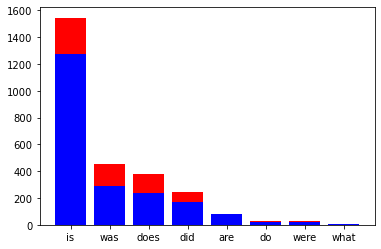

In [242]:
dbpediaBoolData = mostFreqQwordCategory(dbpedia, 'boolean')
dbPediaBoolTopX = topXOfList(dbpediaBoolData, 8)
dbPediaBoolTopXDict = convertTupToDict(dbPediaBoolTopX)

wikiDataBoolTopXDict = convertTupToDict(topXOfList(mostFreqQwordCategory(wikidata, 'boolean'), 8))

plt.bar(list(dbPediaBoolTopXDict.keys()),list(dbPediaBoolTopXDict.values()), color="r")
plt.bar(list(wikiDataBoolTopXDict.keys()),list(wikiDataBoolTopXDict.values()), color='b')
plt.show()

### Double Check Results

To sanity check the results that we got from the graphs we will check each question word and how often it appears in other categories

### Double Check Resulsts functions

In [243]:
def checkQword(data, word):
    categoryList = []
    for i in data:
        if str(i['question']).lower().split()[0] == word:
            categoryList.append(i['category'].lower())
    return categoryList

def categoryPercentages(dict):
    retdict = {}
    total = sum(list(dict.values()))
    for i, j in dict.items():
        retdict[i] = (j/total)
    return retdict

Check all of the most common first words for how often they expect a boolean as an answer in the training data

In [249]:
print("Wikidata is %: ", categoryPercentages(CountFrequency(checkQword(wikidata, 'is'))))
print("Wikidata was %: ", categoryPercentages(CountFrequency(checkQword(wikidata, 'was'))))
print("Wikidata does %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'does'))))
print("Wikidata did %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'did'))))
print("Wikidata are %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'are'))))
print("Wikidata do %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'do'))))
print("Wikidata were %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'were'))))
print("Wikidata what %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'what'))))

print("DPpedia is %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'is'))))
print("DPpedia was %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'was'))))
print("DPpedia does %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'does'))))
print("DPpedia did %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'did'))))
print("DPpedia are %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'are'))))
print("DPpedia do %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'do'))))
print("DPpedia were %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'were'))))
print("DPpedia what %: ", categoryPercentages(CountFrequency(checkQword(dbpedia, 'what'))))

Wikidata is %:  {'boolean': 0.9593984962406015, 'resource': 0.03308270676691729, 'literal': 0.007518796992481203}
Wikidata was %:  {'boolean': 0.9442622950819672, 'resource': 0.03278688524590164, 'literal': 0.022950819672131147}
Wikidata does %:  {'boolean': 0.979381443298969, 'resource': 0.01804123711340206, 'literal': 0.002577319587628866}
Wikidata did %:  {'boolean': 0.9568627450980393, 'resource': 0.03529411764705882, 'literal': 0.00784313725490196}
Wikidata are %:  {'boolean': 0.9873417721518988, 'resource': 0.012658227848101266}
Wikidata do %:  {'boolean': 0.9142857142857143, 'resource': 0.05714285714285714, 'literal': 0.02857142857142857}
Wikidata were %:  {'boolean': 1.0}
Wikidata what %:  {'resource': 0.6663216725315669, 'literal': 0.3324363485820741, 'boolean': 0.001241978886358932}
DPpedia is %:  {'boolean': 0.9759797724399494, 'resource': 0.017699115044247787, 'literal': 0.006321112515802781}
DPpedia was %:  {'boolean': 0.9616204690831557, 'resource': 0.023454157782515993, 